In [33]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import word_tokenize
from wordcloud import STOPWORDS

Find dominant unigrams and bigrams

In [34]:
train_df = pd.read_csv('../input/train.csv')


In [35]:
train_df['processed'] = train_df['question_text'].apply(lambda row: word_tokenize(row))
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token.isalpha()])
train_df['processed'] = train_df['processed'].apply(lambda row: [token.lower() for token in row])
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token not in STOPWORDS])
train_df.head()

,qid,question_text,target,processed
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[quebec, nationalists, see, province, nation]"
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[adopted, dog, encourage, people, adopt, shop]"
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[velocity, affect, time, velocity, affect, spa..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[otto, von, guericke, used, magdeburg, hemisph..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[convert, montra, helicon, d, mountain, bike, ..."


In [36]:
sincere_df = train_df[train_df["target"]==0]
insincere_df = train_df[train_df["target"]==1]

## Unigrams

Count the dominant unigrams in each class and plot them

### Insincere Unigrams

In [37]:
token_dict = {}
for row in insincere_df.itertuples(index=False):
    for token in row.processed:
        if token in token_dict:
            token_dict[token] += 1
        else:
            token_dict[token] = 1


In [38]:
sorted_unigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_unigrams = dict(itertools.islice(sorted_unigrams.items(), 15))
print(top_unigrams)

{'people': 12954, 'trump': 6466, 'women': 5959, 'will': 4635, 'men': 4216, 'think': 3887, 'white': 3714, 'many': 3571, 'muslims': 3492, 'quora': 3407, 'india': 3291, 'indian': 3133, 'black': 2941, 'americans': 2916, 'us': 2885}


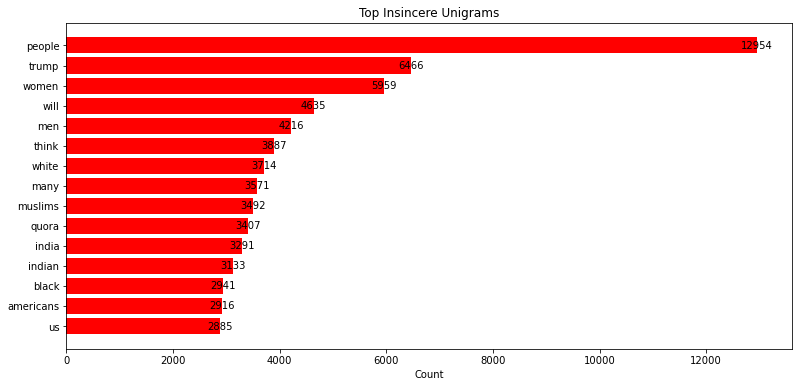

In [39]:
labels = list(top_unigrams.keys())
fig, ax = plt.subplots(figsize=(13, 6))

plt.barh(labels, top_unigrams.values(), color='red')
for i, label in enumerate(top_unigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Insincere Unigrams')


plt.show()

Sincere Unigrams

In [40]:
token_dict = {}
for row in sincere_df.itertuples(index=False):
    for token in row.processed:
        if token in token_dict:
            token_dict[token] += 1
        else:
            token_dict[token] = 1

In [41]:
sorted_unigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_unigrams = dict(itertools.islice(sorted_unigrams.items(), 15))
print(top_unigrams)

{'best': 61636, 'will': 45999, 'people': 43397, 'good': 36813, 'one': 32242, 'india': 29350, 'make': 26233, 'time': 22197, 'think': 22145, 'someone': 21846, 'much': 21463, 'life': 21361, 'many': 20919, 'use': 20746, 'way': 19732}


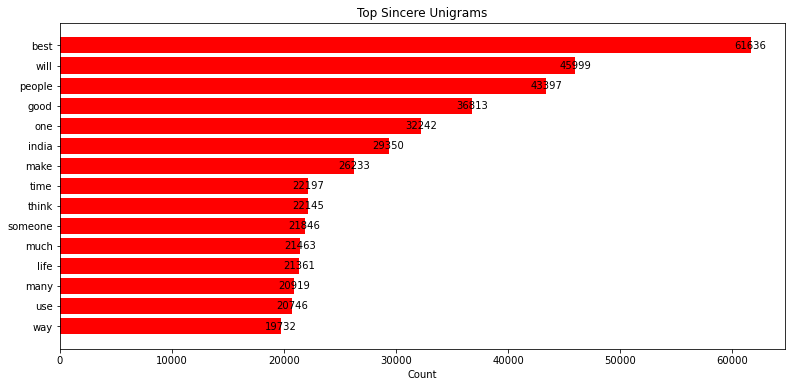

In [42]:
labels = list(top_unigrams.keys())
fig, ax = plt.subplots(figsize=(13, 6))

plt.barh(labels, top_unigrams.values(), color='red')
for i, label in enumerate(top_unigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Sincere Unigrams')


plt.show()

## Bigrams

### Insincere Bigrams

In [43]:
token_dict = {}
for row in insincere_df.itertuples(index=False):
    token_count = len(row.processed)

    for i in range(token_count):
        if i == token_count - 1:
            continue

        bigram = " ".join([row.processed[i], row.processed[i+1]])
        if bigram in token_dict:
            token_dict[bigram] += 1
        else:
            token_dict[bigram] = 1

In [44]:
sorted_bigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_bigrams = dict(itertools.islice(sorted_bigrams.items(), 15))
print(top_bigrams)

{'donald trump': 1438, 'white people': 877, 'black people': 813, 'don t': 671, 'united states': 581, 'president trump': 479, 'trump supporters': 416, 'many people': 401, 'hillary clinton': 401, 'year old': 370, 'even though': 342, 'people think': 317, 'chinese people': 308, 'north korea': 259, 'indian muslims': 257}


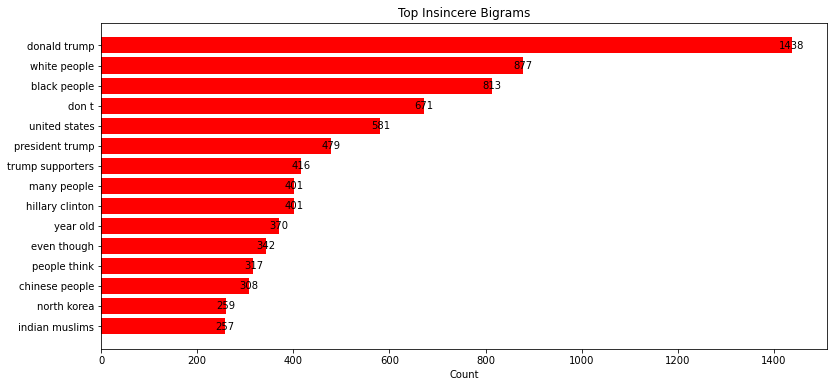

In [45]:
labels = list(top_bigrams.keys())
fig, ax = plt.subplots(figsize=(13, 6))

plt.barh(labels, top_bigrams.values(), color='red')
for i, label in enumerate(top_bigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Insincere Bigrams')


plt.show()


### Sincere Bigrams

In [46]:
token_dict = {}
for row in sincere_df.itertuples(index=False):
    token_count = len(row.processed)

    for i in range(token_count):
        if i == token_count - 1:
            continue

        bigram = " ".join([row.processed[i], row.processed[i+1]])
        if bigram in token_dict:
            token_dict[bigram] += 1
        else:
            token_dict[bigram] = 1

In [47]:
sorted_bigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_bigrams = dict(itertools.islice(sorted_bigrams.items(), 15))
print(top_bigrams)

{'best way': 7010, 'year old': 3370, 'united states': 3139, 'high school': 2689, 'computer science': 2630, 'will happen': 2207, 'donald trump': 2075, 'social media': 2056, 'many people': 2018, 'even though': 1884, 'long take': 1860, 'years old': 1663, 'don t': 1596, 'north korea': 1571, 'jee mains': 1493}


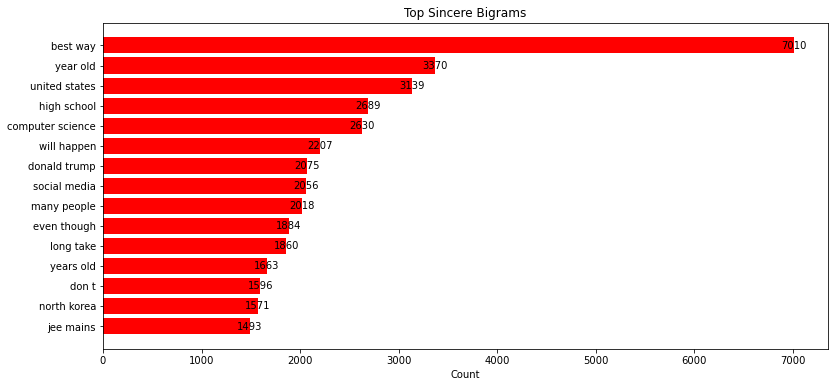

In [48]:
labels = list(top_bigrams.keys())
fig, ax = plt.subplots(figsize=(13, 6))

plt.barh(labels, top_bigrams.values(), color='red')
for i, label in enumerate(top_bigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Sincere Bigrams')


plt.show()